In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv("C:/Users/Aswin/Desktop/Analytics Vidhya/Loan_Prediction/train_ctrUa4K.csv")
data2 = pd.read_csv("C:/Users/Aswin/Desktop/Analytics Vidhya/Loan_Prediction/test_lAUu6dG.csv")
data2_stor = data2
#data['Loan_Status'].value_counts()
data.dropna(inplace=True)
#data2.dropna(inplace=True)
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [190]:
data.columns


Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [191]:
data["Married"]= data["Married"].replace("Yes",1) 
data["Married"]= data["Married"].replace("No",0) 
data["Gender"]= data["Gender"].replace("Male",1) 
data["Gender"]= data["Gender"].replace("Female",0) 
data["Education"]= data["Education"].replace("Graduate",1) 
data["Education"]= data["Education"].replace("Not Graduate",0) 
data["Self_Employed"]= data["Self_Employed"].replace("Yes",1) 
data["Self_Employed"]= data["Self_Employed"].replace("No",0) 
data["Property_Area"]= data["Property_Area"].replace("Urban",1)
data["Property_Area"]= data["Property_Area"].replace("Rural",0)
data["Property_Area"]= data["Property_Area"].replace("Semiurban",0.5)
data["Loan_Status"]= data["Loan_Status"].replace("Y",1)
data["Loan_Status"]= data["Loan_Status"].replace("N",0)
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0.0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1.0,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1.0,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1.0,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,1.0,1


In [192]:
data2["Married"]= data2["Married"].replace("Yes",1) 
data2["Married"]= data2["Married"].replace("No",0) 
data2["Gender"]= data2["Gender"].replace("Male",1) 
data2["Gender"]= data2["Gender"].replace("Female",0) 
data2["Education"]= data2["Education"].replace("Graduate",1) 
data2["Education"]= data2["Education"].replace("Not Graduate",0) 
data2["Self_Employed"]= data2["Self_Employed"].replace("Yes",1) 
data2["Self_Employed"]= data2["Self_Employed"].replace("No",0) 
data2["Property_Area"]= data2["Property_Area"].replace("Urban",1)
data2["Property_Area"]= data2["Property_Area"].replace("Rural",0)
data2["Property_Area"]= data2["Property_Area"].replace("Semiurban",0.5)
data2["Dependents"]= data2["Dependents"].replace("3+",5)
#data2["Loan_Status"]= data2["Loan_Status"].replace("Y",1)
#data2["Loan_Status"]= data2["Loan_Status"].replace("N",0)
data2.head()
#data2

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,1.0,1,0,1,0.0,5720,0,110.0,360.0,1.0,1.0
1,LP001022,1.0,1,1,1,0.0,3076,1500,126.0,360.0,1.0,1.0
2,LP001031,1.0,1,2,1,0.0,5000,1800,208.0,360.0,1.0,1.0
3,LP001035,1.0,1,2,1,0.0,2340,2546,100.0,360.0,NaN,1.0
4,LP001051,1.0,0,0,0,0.0,3276,0,78.0,360.0,1.0,1.0


In [193]:
x_data = data[['Gender', 'Married', 'Education','Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term', 'Credit_History', 'Property_Area']]

In [194]:
data2 = data2[['Gender', 'Married',  'Education','Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term', 'Credit_History', 'Property_Area']]

In [195]:
from sklearn.preprocessing import Imputer
#from sklearn.impute import SimpleImputer  
imputer = Imputer(missing_values=np.nan, strategy='mean')
imputer.fit(data2)
imputed_train_df = imputer.transform(data2)
imputed_train_df = pd.DataFrame(imputed_train_df)
imputed_train_df.head()

,0,1,2,3,4,5,6,7,8,9
0,1.0,1.0,1.0,0.0,5720.0,0.0,110.0,360.0,1.000000,1.0
1,1.0,1.0,1.0,0.0,3076.0,1500.0,126.0,360.0,1.000000,1.0
2,1.0,1.0,1.0,0.0,5000.0,1800.0,208.0,360.0,1.000000,1.0
3,1.0,1.0,1.0,0.0,2340.0,2546.0,100.0,360.0,0.825444,1.0
4,1.0,0.0,0.0,0.0,3276.0,0.0,78.0,360.0,1.000000,1.0


In [196]:
data.groupby(['Education']).mean()

,Gender,Married,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Education,,,,,,,,,,
0,0.865979,0.649485,0.134021,3888.350515,1193.989691,117.123711,328.824742,0.814433,0.469072,0.628866
1,0.809399,0.647520,0.138381,5738.018277,1679.132950,151.728460,345.399478,0.864230,0.522193,0.707572


In [197]:
data.groupby(['Self_Employed']).mean()

,Gender,Married,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Self_Employed,,,,,,,,,,
0,0.821256,0.644928,0.797101,4978.115942,1582.668889,140.869565,342.956522,0.857488,0.519324,0.698068
1,0.818182,0.666667,0.803030,7786.227273,1571.212121,168.984848,336.363636,0.833333,0.462121,0.651515


In [198]:
data.groupby(['Gender']).mean()

,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,,,,,,,,,,
0,0.290698,0.848837,0.139535,4968.593023,706.988372,127.697674,354.418605,0.837209,0.511628,0.627907
1,0.725888,0.786802,0.137056,5450.588832,1771.888122,148.454315,339.350254,0.857868,0.511421,0.705584


In [199]:
data.groupby(['Married']).mean()

,Gender,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Married,,,,,,,,,,
0,0.639053,0.798817,0.130178,5082.195266,1215.893491,124.721893,351.550296,0.840237,0.491124,0.621302
1,0.919614,0.797428,0.141479,5517.491961,1779.546367,155.610932,336.887460,0.861736,0.522508,0.729904


In [200]:
import matplotlib.pyplot as plt
import seaborn as sns

In [201]:
emp = data.loc[data['Self_Employed']== 1 ]
unemp = data.loc[data['Self_Employed']== 0]
unemp_grad = unemp.loc[unemp['Education']==1]
emp_grad = emp.loc[emp['Education']==1]
emp_not_grad = emp.loc[emp['Education']==0]
unemp_not_grad = unemp.loc[unemp['Education']==0]
unemp_not_grad['Loan_Status'].value_counts()

1    53
0    31
Name: Loan_Status, dtype: int64

In [202]:
unemp_grad['Loan_Status'].value_counts()

1    236
0     94
Name: Loan_Status, dtype: int64

In [203]:
emp_grad['Loan_Status'].value_counts()

1    35
0    18
Name: Loan_Status, dtype: int64

In [204]:
emp_not_grad ['Loan_Status'].value_counts()

1    8
0    5
Name: Loan_Status, dtype: int64

In [205]:
data.corr(method='kendall')

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.349424,-0.059245,-0.002761,0.040191,0.201146,0.122181,-0.100836,0.022447,0.000867,0.064504
Married,0.349424,1.000000,-0.001652,0.015674,-0.001944,0.230502,0.167429,-0.123171,0.029095,0.036364,0.112321
Education,-0.059245,-0.001652,1.000000,0.005085,0.147043,0.025306,0.144996,0.086889,0.056656,0.051530,0.068437
Self_Employed,-0.002761,0.015674,0.005085,1.000000,0.188417,-0.047508,0.090885,-0.056756,-0.023568,-0.047779,-0.034715
ApplicantIncome,0.040191,-0.001944,0.147043,0.188417,1.000000,-0.223394,0.374099,-0.034471,0.033376,-0.056759,-0.007176
CoapplicantIncome,0.201146,0.230502,0.025306,-0.047508,-0.223394,1.000000,0.196914,-0.006505,-0.013236,-0.050714,0.027859
LoanAmount,0.122181,0.167429,0.144996,0.090885,0.374099,0.196914,1.000000,0.030805,-0.018858,-0.095534,-0.029653
Loan_Amount_Term,-0.100836,-0.123171,0.086889,-0.056756,-0.034471,-0.006505,0.030805,1.000000,0.052208,-0.032177,-0.008470
Credit_History,0.022447,0.029095,0.056656,-0.023568,0.033376,-0.013236,-0.018858,0.052208,1.000000,-0.003296,0.529390
Property_Area,0.000867,0.036364,0.051530,-0.047779,-0.056759,-0.050714,-0.095534,-0.032177,-0.003296,1.000000,0.028072


In [65]:
#unemp_not_grad_married = unemp_not_grad.groupby(['Married'])
#unemp_not_grad_married

1    394
0     86
Name: Gender, dtype: int64


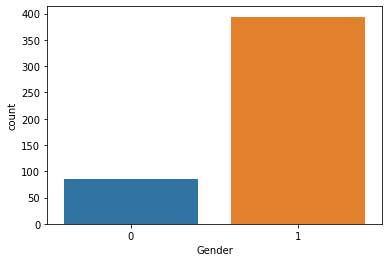

In [206]:
ax = sns.countplot(data['Gender'])
print(data['Gender'].value_counts())

1    75
0     9
Name: Gender, dtype: int64


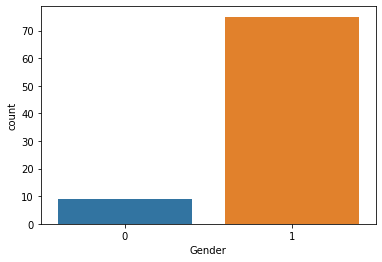

In [207]:
ax = sns.countplot(unemp_not_grad['Gender'])
print(unemp_not_grad['Gender'].value_counts())

In [208]:
x_data = data[['Gender', 'Married', 'Education','Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term', 'Credit_History', 'Property_Area']]
y_data = data['Loan_Status']
#x_data
#y_data
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x_data)
x_data = pd.DataFrame(x_scaled)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)
y_train.head()

172    0
288    1
607    1
55     1
461    1
Name: Loan_Status, dtype: int64

In [209]:
#x_test_data = data2[['Gender', 'Married', 'Education','Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term', 'Credit_History', 'Property_Area']]
#y_test_data = data2['Loan_Status']
x_test_data = data2_stor
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(imputed_train_df)
x_test_data = pd.DataFrame(x_scaled)

In [210]:
from keras.models import Sequential
from keras.layers import Dense
import numpy 
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
model = Sequential()
model.add(Dense(12, input_dim=10, init='uniform', activation='relu'))
model.add(Dense(10, init='uniform', activation='relu'))
model.add(Dense(1, init='uniform', activation='sigmoid'))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(12, input_dim=10, activation="relu", kernel_initializer="uniform")`
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(10, activation="relu", kernel_initializer="uniform")`
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.


In [211]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [212]:
model.fit(x_train, y_train, validation_split=0.33, nb_epoch=150, batch_size=10)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 257 samples, validate on 127 samples
Epoch 1/150
257/257 [==============================] - 3s 11ms/step - loss: 0.6909 - accuracy: 0.6809 - val_loss: 0.6874 - val_accuracy: 0.6850
Epoch 2/150
257/257 [==============================] - 0s 314us/step - loss: 0.6834 - accuracy: 0.6887 - val_loss: 0.6779 - val_accuracy: 0.6850
Epoch 3/150
257/257 [==============================] - 0s 295us/step - loss: 0.6705 - accuracy: 0.6887 - val_loss: 0.6595 - val_accuracy: 0.6850
Epoch 4/150
257/257 [==============================] - 0s 248us/step - loss: 0.6498 - accuracy: 0.6887 - val_loss: 0.6367 - val_accuracy: 0.6850
Epoch 5/150
257/257 [==============================] - 0s 249us/step - loss: 0.6273 - accuracy: 0.6887 - val_loss: 0.6176 - val_accuracy: 0.6850
Epoch 6/150
257/257 [==============================] - 0s 264us/step - loss: 0.6122 - accuracy: 0.6887 - val_loss: 0.6044 - val_accuracy: 0.6850
Epoch 7/150
257/257 [==============================] - 0s 322us/step - loss: 0.6029 -

Epoch 57/150
257/257 [==============================] - 0s 279us/step - loss: 0.4704 - accuracy: 0.8054 - val_loss: 0.4880 - val_accuracy: 0.8189
Epoch 58/150
257/257 [==============================] - 0s 229us/step - loss: 0.4716 - accuracy: 0.8054 - val_loss: 0.4881 - val_accuracy: 0.8189
Epoch 59/150
257/257 [==============================] - 0s 291us/step - loss: 0.4700 - accuracy: 0.8132 - val_loss: 0.4889 - val_accuracy: 0.8031
Epoch 60/150
257/257 [==============================] - 0s 246us/step - loss: 0.4709 - accuracy: 0.8093 - val_loss: 0.4888 - val_accuracy: 0.8189
Epoch 61/150
257/257 [==============================] - 0s 291us/step - loss: 0.4702 - accuracy: 0.8210 - val_loss: 0.4897 - val_accuracy: 0.8110
Epoch 62/150
257/257 [==============================] - 0s 260us/step - loss: 0.4710 - accuracy: 0.8093 - val_loss: 0.4896 - val_accuracy: 0.8110
Epoch 63/150
257/257 [==============================] - 0s 245us/step - loss: 0.4695 - accuracy: 0.8093 - val_loss: 0.4894 -

257/257 [==============================] - 0s 260us/step - loss: 0.4617 - accuracy: 0.8171 - val_loss: 0.4993 - val_accuracy: 0.7953
Epoch 114/150
257/257 [==============================] - 0s 268us/step - loss: 0.4627 - accuracy: 0.8171 - val_loss: 0.4995 - val_accuracy: 0.7953
Epoch 115/150
257/257 [==============================] - 0s 256us/step - loss: 0.4623 - accuracy: 0.8171 - val_loss: 0.4990 - val_accuracy: 0.7953
Epoch 116/150
257/257 [==============================] - 0s 249us/step - loss: 0.4646 - accuracy: 0.8171 - val_loss: 0.5012 - val_accuracy: 0.7953
Epoch 117/150
257/257 [==============================] - 0s 244us/step - loss: 0.4601 - accuracy: 0.8171 - val_loss: 0.4992 - val_accuracy: 0.7953
Epoch 118/150
257/257 [==============================] - 0s 259us/step - loss: 0.4616 - accuracy: 0.8171 - val_loss: 0.5004 - val_accuracy: 0.7953
Epoch 119/150
257/257 [==============================] - 0s 272us/step - loss: 0.4608 - accuracy: 0.8171 - val_loss: 0.4992 - val_ac

In [213]:
scores = model.evaluate(x_test, y_test)
print((model.metrics_names[1], scores[1]*100))
#print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

96/96 [==============================] - 0s 83us/step
('accuracy', 80.20833134651184)


Now let's try for sk learn. 

In [214]:
from sklearn import svm
clf = svm.SVC()
clf.fit(x_train, y_train)
#SVC()
y_pred = clf.predict(x_test)#([[2., 2.]])
y_pred


array([1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1], dtype=int64)

In [215]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8229166666666666


Now lets try for random forest classifier 

In [216]:
data2.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1.0,1,1,0.0,5720,0,110.0,360.0,1.0,1.0
1,1.0,1,1,0.0,3076,1500,126.0,360.0,1.0,1.0
2,1.0,1,1,0.0,5000,1800,208.0,360.0,1.0,1.0
3,1.0,1,1,0.0,2340,2546,100.0,360.0,NaN,1.0
4,1.0,0,0,0.0,3276,0,78.0,360.0,1.0,1.0


In [217]:
from sklearn.ensemble import RandomForestClassifier 

Classifier = RandomForestClassifier(n_estimators=100, random_state=0)
Classifier.fit(x_train, y_train)
y_pred1 = Classifier.predict(x_test_data)
len(y_pred1)


367

In [218]:
data2_res = pd.DataFrame()
data2_res['Loan_ID'] = data2_stor['Loan_ID']
data2_res['Loan_Status']  = y_pred1
data2_res.head()
#data2
data2_res["Loan_Status"]= data2_res["Loan_Status"].replace(1,"Y") 
data2_res["Loan_Status"]= data2_res["Loan_Status"].replace(0,"N") 
data2_res

#from sklearn import metrics
#print("Accuracy:",metrics.accuracy_score(y_test, y_pred1))

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
5,LP001054,Y
6,LP001055,Y
7,LP001056,N
8,LP001059,Y
9,LP001067,Y


In [188]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.17708333333333334
Mean Squared Error: 0.17708333333333334
Root Mean Squared Error: 0.4208127057650866


In [219]:
data2_res.to_csv('Load_pred_submission.csv')